## Dataset loading & Visualizing

In [1]:
import tensorflow as tf
import os

In [2]:
from keras import Sequential, layers
import numpy as np
import matplotlib.pyplot as plt


In [6]:
cwd = "C:/Users/kvams/Desktop/Bmedi/Dataset"
Classes = os.listdir(cwd)

Classes

['Azadirachta indica',
 'Calotropis gigantea',
 'Centella asiatica',
 'Hibiscus rosa-sinensis',
 'Justicia adhatoda',
 'Kalanchoe pinnata',
 'Mikania micrantha',
 'Ocimum tenuiflorum',
 'Phyllanthus emblica',
 'Terminalia arjuna']

In [7]:
# data <- tf.data.Dataset
train , val = tf.keras.utils.image_dataset_from_directory(
    cwd,
    labels='inferred',
    label_mode='int',
    class_names=Classes,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=143,
    validation_split=0.2,
    subset="both",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 38605 files belonging to 10 classes.
Using 30884 files for training.
Using 7721 files for validation.


In [8]:
classNames = train.class_names
classNames

['Azadirachta indica',
 'Calotropis gigantea',
 'Centella asiatica',
 'Hibiscus rosa-sinensis',
 'Justicia adhatoda',
 'Kalanchoe pinnata',
 'Mikania micrantha',
 'Ocimum tenuiflorum',
 'Phyllanthus emblica',
 'Terminalia arjuna']

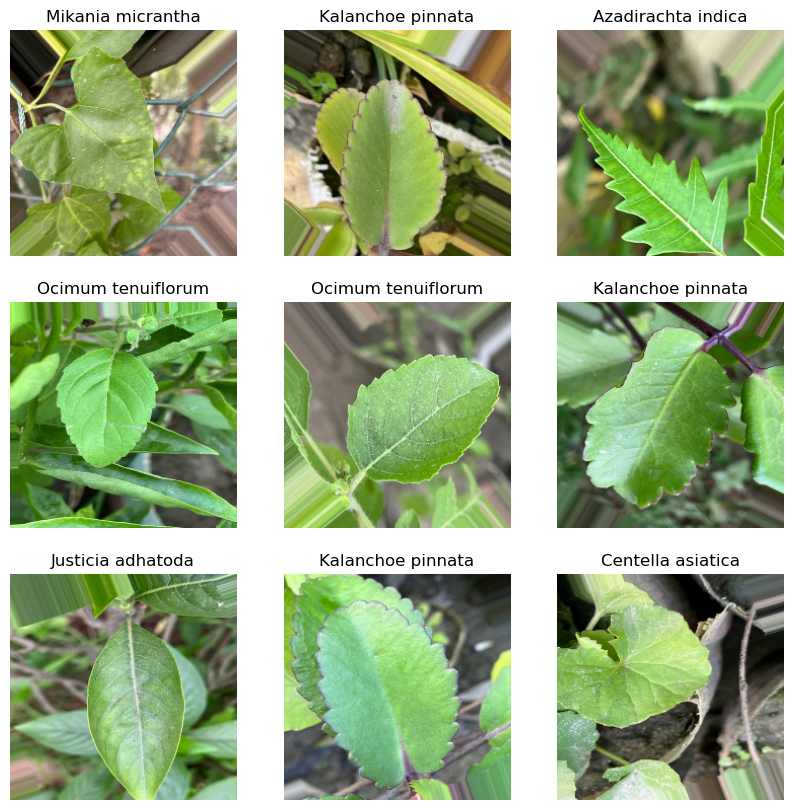

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classNames[labels[i]])
    plt.axis("off")

## Convolutional Neural Network

In [10]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [11]:
num_classes = len(classNames)

basicmodel = Sequential([
  layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
basicmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
basicmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [14]:
epochs=10
bhistory = basicmodel.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10
966/966 [==============================] - 652s 673ms/step - loss: 1.2917 - accuracy: 0.5448 - val_loss: 0.8137 - val_accuracy: 0.7214
Epoch 2/10
966/966 [==============================] - 713s 738ms/step - loss: 0.6054 - accuracy: 0.7897 - val_loss: 0.5506 - val_accuracy: 0.8082
Epoch 3/10
966/966 [==============================] - 665s 688ms/step - loss: 0.3434 - accuracy: 0.8808 - val_loss: 0.5090 - val_accuracy: 0.8255
Epoch 4/10
966/966 [==============================] - 677s 701ms/step - loss: 0.1946 - accuracy: 0.9310 - val_loss: 0.6149 - val_accuracy: 0.8026
Epoch 5/10
966/966 [==============================] - 664s 687ms/step - loss: 0.1219 - accuracy: 0.9584 - val_loss: 0.6149 - val_accuracy: 0.8148
Epoch 6/10
966/966 [==============================] - 610s 631ms/step - loss: 0.0911 - accuracy: 0.9682 - val_loss: 0.6824 - val_accuracy: 0.8381
Epoch 7/10
966/966 [==============================] - 608s 629ms/step - loss: 0.0647 - accuracy: 0.9785 - val_loss: 0.8429 -

## Ploting Model Performance

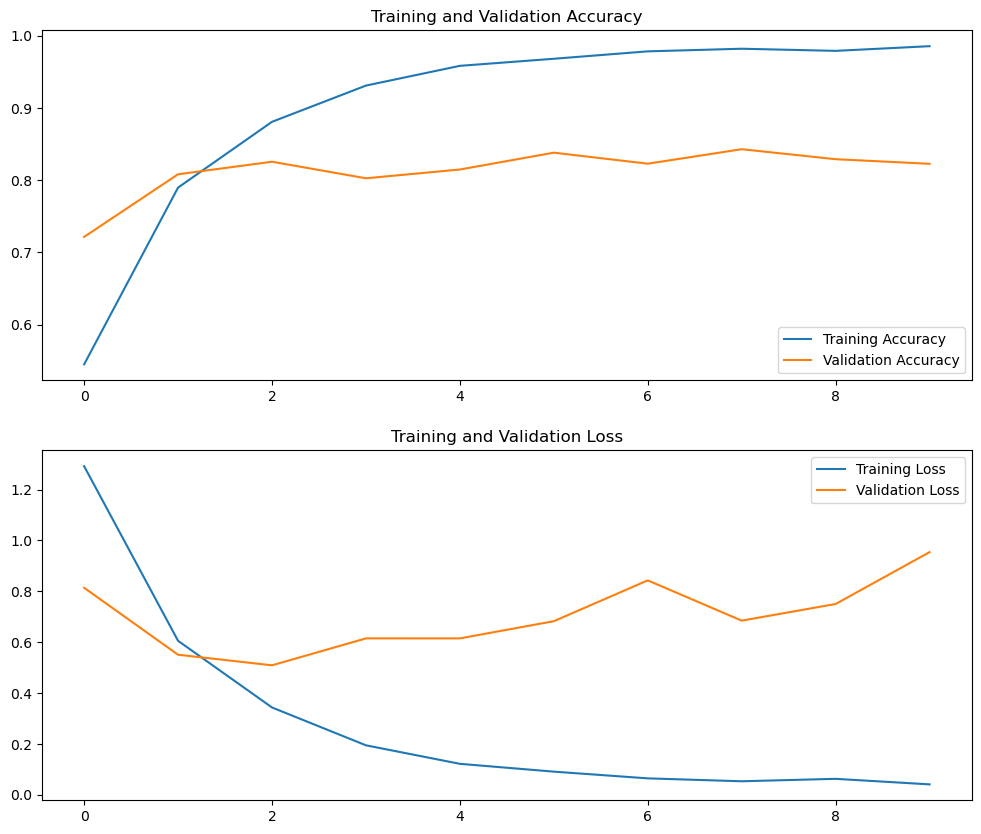

In [17]:
acc = bhistory.history['accuracy']
val_acc = bhistory.history['val_accuracy']

loss = bhistory.history['loss']
val_loss = bhistory.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predicting sample data on Model

In [18]:
# @tf.function(reduce_retracing=True)
def Predictor(trainedModel, test_img_path):
    

    img = tf.keras.utils.load_img(test_img_path, target_size=(224, 224))

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = trainedModel.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(classNames[np.argmax(score)], 100 * np.max(score))
    )

In [20]:
Predictor(basicmodel,"C:/Users/kvams/Desktop/Bmedi/Dataset/Kalanchoe pinnata/Kalanchoe pinnata_0_4574.jpg")


1/1 [==============================] - 0s 493ms/step
This image most likely belongs to Kalanchoe pinnata with a 95.61 percent confidence.


## Transfer Learning

In [21]:
import time
import PIL.Image as Image
import tensorflow_hub as hub
import datetime
%load_ext tensorboard

In [22]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model1 = mobilenet_v2

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [24]:
IMAGE_SHAPE = (224, 224, 3)

classifier1 = tf.keras.Sequential([
    hub.KerasLayer(classifier_model1, input_shape=IMAGE_SHAPE)
])

In [25]:
classifier1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
Total params: 3540265 (13.51 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


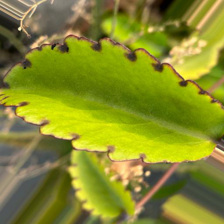

In [27]:
test_img_path = "C:/Users/kvams/Desktop/Bmedi/Dataset/Kalanchoe pinnata/Kalanchoe pinnata_0_4574.jpg"
test_img_path = Image.open(test_img_path).resize((224,224))
test_img_path

In [28]:
test_img_path = np.array(test_img_path)/255.0
test_img_path.shape

(224, 224, 3)

In [29]:
result = classifier1.predict(test_img_path[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 309ms/step


(1, 1001)

In [30]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=311>

In [31]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

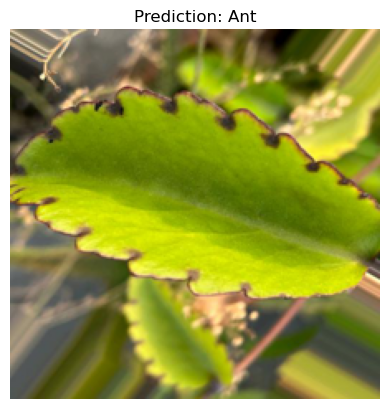

In [32]:
plt.imshow(test_img_path)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [33]:
class_names = np.array(train.class_names)
print(class_names)

['Azadirachta indica' 'Calotropis gigantea' 'Centella asiatica'
 'Hibiscus rosa-sinensis' 'Justicia adhatoda' 'Kalanchoe pinnata'
 'Mikania micrantha' 'Ocimum tenuiflorum' 'Phyllanthus emblica'
 'Terminalia arjuna']


In [34]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [35]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
result_batch = classifier1.predict(train_ds)

966/966 [==============================] - 496s 513ms/step


In [37]:
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]
predicted_class_names

array(['walking stick', 'green lizard', 'broom', ..., 'head cabbage',
       'window shade', 'head cabbage'], dtype='<U30')

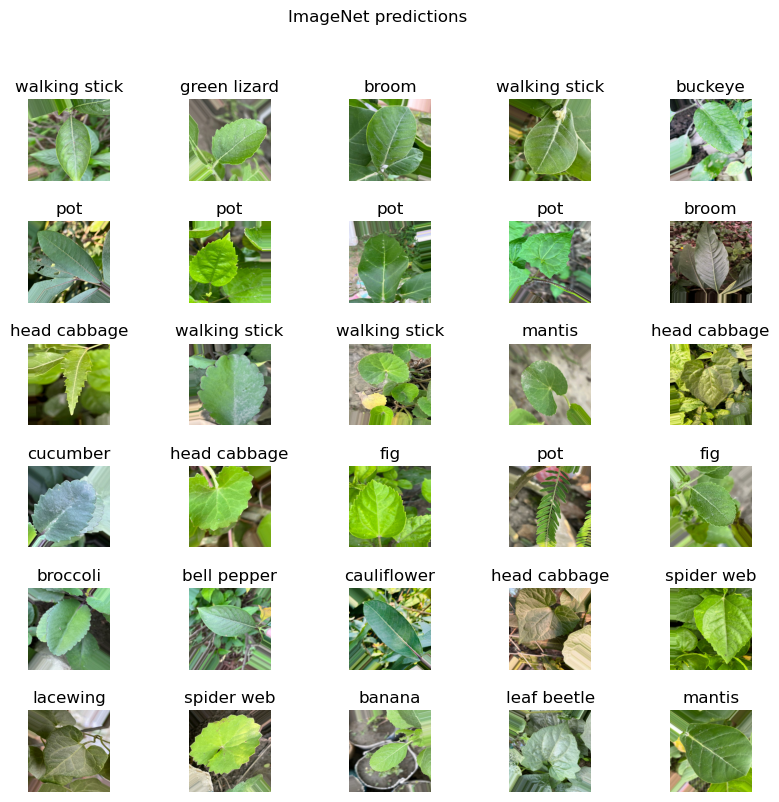

In [38]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n].numpy().astype("uint8"))
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

## Transfer Learning with fine tuning

In [39]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

feature_extractor_model = mobilenet_v2

In [40]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [41]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1001)


In [42]:
num_classes = len(class_names)

model3 = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_2 (Dense)             (None, 10)                10020     
                                                                 
Total params: 3550285 (13.54 MB)
Trainable params: 10020 (39.14 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [46]:
model3.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

In [48]:
NUM_EPOCHS1 = 10

history = model3.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS1,
                    callbacks=tensorboard_callback)

Epoch 1/10
966/966 [==============================] - 600s 622ms/step - loss: 0.1936 - acc: 0.9409 - val_loss: 0.1012 - val_acc: 0.9678
Epoch 2/10
966/966 [==============================] - 616s 638ms/step - loss: 0.0815 - acc: 0.9744 - val_loss: 0.0747 - val_acc: 0.9763
Epoch 3/10
966/966 [==============================] - 595s 616ms/step - loss: 0.0613 - acc: 0.9805 - val_loss: 0.0649 - val_acc: 0.9788
Epoch 4/10
966/966 [==============================] - 602s 624ms/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0598 - val_acc: 0.9801
Epoch 5/10
966/966 [==============================] - 602s 623ms/step - loss: 0.0434 - acc: 0.9869 - val_loss: 0.0565 - val_acc: 0.9801
Epoch 6/10
966/966 [==============================] - 618s 640ms/step - loss: 0.0382 - acc: 0.9883 - val_loss: 0.0537 - val_acc: 0.9811
Epoch 7/10
966/966 [==============================] - 636s 658ms/step - loss: 0.0340 - acc: 0.9898 - val_loss: 0.0520 - val_acc: 0.9816
Epoch 8/10
966/966 [============================

In [50]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15528), started 0:05:50 ago. (Use '!kill 15528' to kill it.)

In [51]:
predicted_batch = model3.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

1/1 [==============================] - 1s 1s/step
['Justicia adhatoda' 'Calotropis gigantea' 'Justicia adhatoda'
 'Justicia adhatoda' 'Justicia adhatoda' 'Justicia adhatoda'
 'Justicia adhatoda' 'Justicia adhatoda' 'Justicia adhatoda'
 'Kalanchoe pinnata' 'Centella asiatica' 'Justicia adhatoda'
 'Justicia adhatoda' 'Ocimum tenuiflorum' 'Justicia adhatoda'
 'Justicia adhatoda' 'Hibiscus rosa-sinensis' 'Justicia adhatoda'
 'Justicia adhatoda' 'Justicia adhatoda' 'Justicia adhatoda'
 'Justicia adhatoda' 'Justicia adhatoda' 'Justicia adhatoda'
 'Kalanchoe pinnata' 'Justicia adhatoda' 'Justicia adhatoda'
 'Ocimum tenuiflorum' 'Justicia adhatoda' 'Justicia adhatoda'
 'Justicia adhatoda' 'Justicia adhatoda']


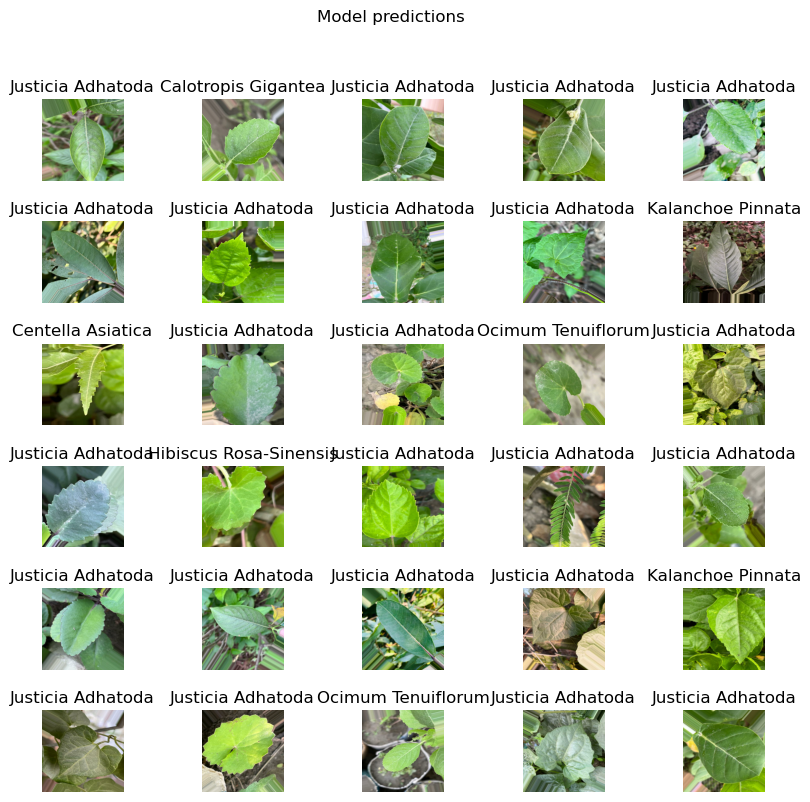

In [52]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n].numpy().astype("uint8"))
  plt.title(predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## RSS Net

In [53]:
from keras import layers, Model, Input
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dropout, Dense

In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report

In [55]:
rssbaseModel = tf.keras.applications.resnet50.ResNet50(weights="imagenet", include_top=False,
                     input_tensor=Input(shape=(224, 224, 3)))
rssbaseModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [56]:
rssheadModel = rssbaseModel.output
rssheadModel = AveragePooling2D(pool_size=(7, 7))(rssheadModel)
rssheadModel = Flatten(name="flatten")(rssheadModel)
rssheadModel = Dense(256, activation="relu")(rssheadModel)
rssheadModel = Dropout(0.5)(rssheadModel)
rssheadModel = Dense(len(classNames), activation="softmax")(rssheadModel)
rssmodel = Model(inputs=rssbaseModel.input, outputs=rssheadModel)
rssmodel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [57]:
for layer in rssbaseModel.layers:
	layer.trainable = False

In [60]:
NUM_EPOCHS2 = 5
opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-4, decay=1e-4 / NUM_EPOCHS2)
rssmodel.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

rsshistory = rssmodel.fit(
  train,
  validation_data=val,
  epochs=NUM_EPOCHS2
)

Epoch 1/5
966/966 [==============================] - 2253s 2s/step - loss: 0.1485 - accuracy: 0.9545 - val_loss: 0.0611 - val_accuracy: 0.9864
Epoch 2/5
966/966 [==============================] - 2256s 2s/step - loss: 0.0767 - accuracy: 0.9778 - val_loss: 0.0345 - val_accuracy: 0.9940
Epoch 3/5
966/966 [==============================] - 2241s 2s/step - loss: 0.0514 - accuracy: 0.9865 - val_loss: 0.0236 - val_accuracy: 0.9961
Epoch 4/5
966/966 [==============================] - 2256s 2s/step - loss: 0.0375 - accuracy: 0.9905 - val_loss: 0.0193 - val_accuracy: 0.9960
Epoch 5/5
966/966 [==============================] - 2304s 2s/step - loss: 0.0278 - accuracy: 0.9927 - val_loss: 0.0120 - val_accuracy: 0.9978


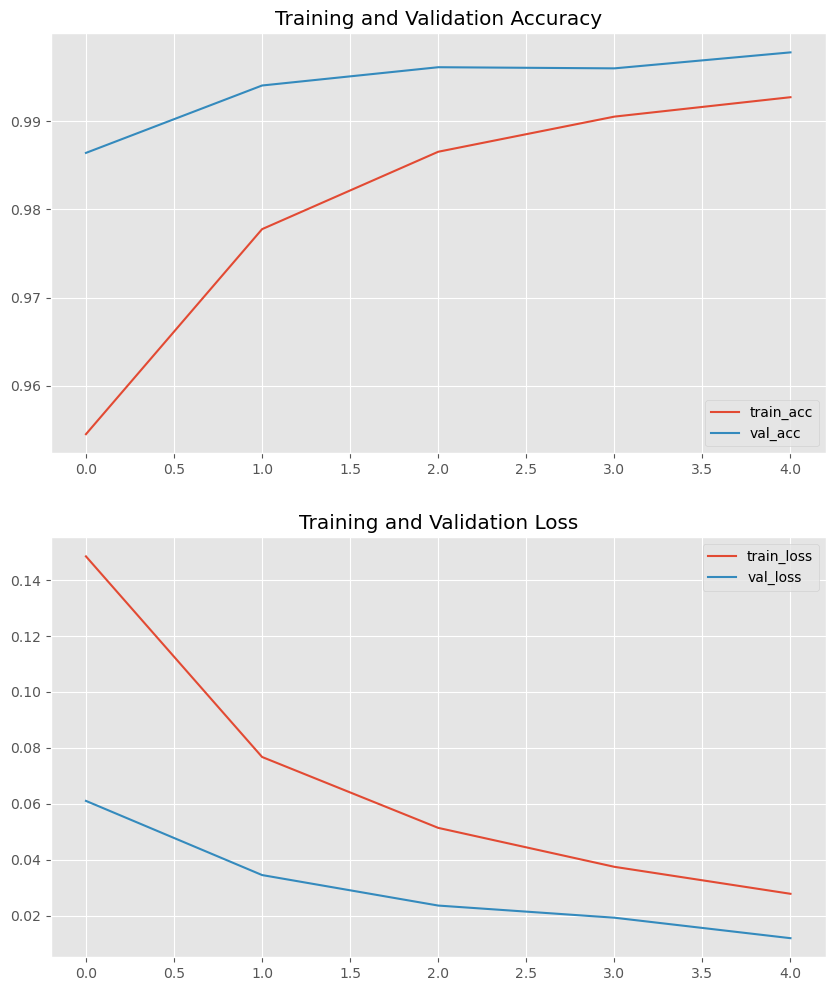

In [61]:
plt.style.use("ggplot")
# plt.figure()



plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(range(NUM_EPOCHS2), rsshistory.history["accuracy"], label="train_acc")
plt.plot(range(NUM_EPOCHS2), rsshistory.history["val_accuracy"], label="val_acc")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(NUM_EPOCHS2), rsshistory.history["loss"], label="train_loss")
plt.plot(range(NUM_EPOCHS2), rsshistory.history["val_loss"], label="val_loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Prediction using RSS Net

In [62]:
Predictor(rssmodel, "C:/Users/kvams/Desktop/Bmedi/Dataset/Kalanchoe pinnata/Kalanchoe pinnata_0_4574.jpg")

1/1 [==============================] - 1s 754ms/step
This image most likely belongs to Kalanchoe pinnata with a 23.20 percent confidence.


## VGG Net

In [63]:
vggbaseModel = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False,
                     input_tensor=Input(shape=(224, 224, 3)))
vggbaseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [64]:
vggheadModel = vggbaseModel.output
vggheadModel = AveragePooling2D(pool_size=(7, 7))(vggheadModel)
vggheadModel = Flatten(name="flatten")(vggheadModel)
vggheadModel = Dense(256, activation="relu")(vggheadModel)
vggheadModel = Dropout(0.5)(vggheadModel)
vggheadModel = Dense(len(classNames), activation="softmax")(vggheadModel)
vggmodel = Model(inputs=vggbaseModel.input, outputs=vggheadModel)
vggmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [65]:
for layer in vggbaseModel.layers:
	layer.trainable = False

In [66]:
NUM_EPOCHS3 = 2
opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-4, decay=1e-4 / NUM_EPOCHS3)
vggmodel.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

vgghistory = vggmodel.fit(
  train,
  validation_data=val,
  epochs=NUM_EPOCHS3
)

Epoch 1/2
966/966 [==============================] - 6251s 6s/step - loss: 1.9439 - accuracy: 0.5636 - val_loss: 0.3783 - val_accuracy: 0.8788
Epoch 2/2
966/966 [==============================] - 5730s 6s/step - loss: 0.5657 - accuracy: 0.8059 - val_loss: 0.2091 - val_accuracy: 0.9343


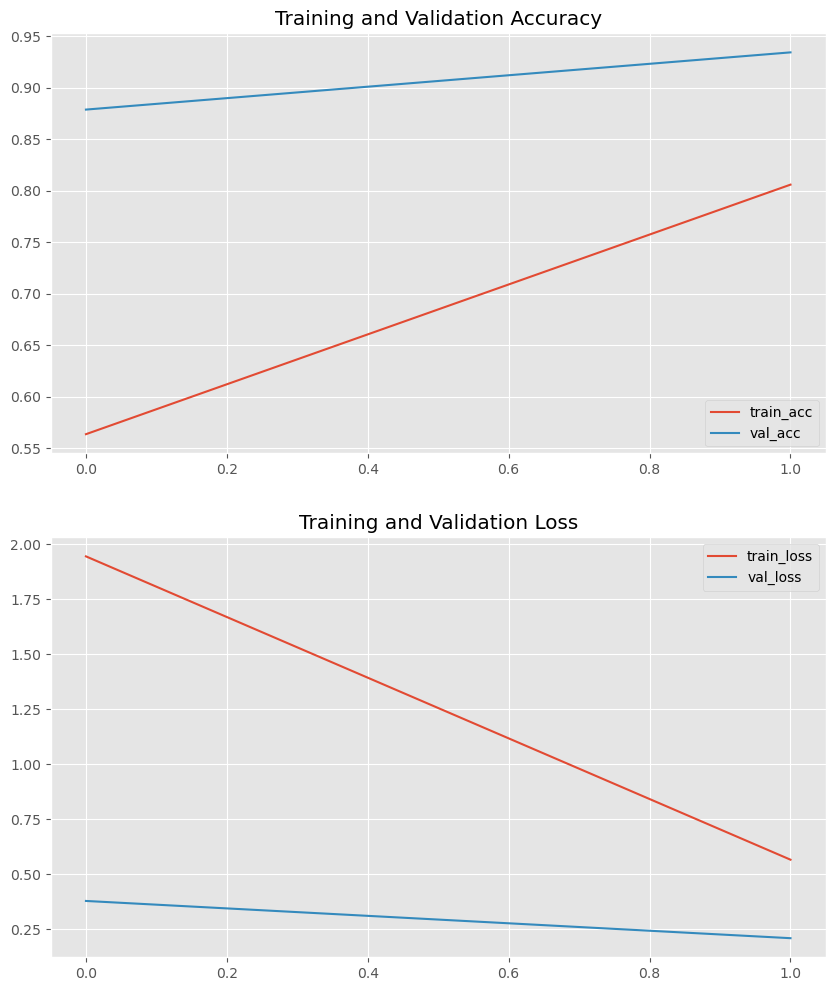

In [67]:
plt.style.use("ggplot")
# plt.figure()



plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(range(NUM_EPOCHS3), vgghistory.history["accuracy"], label="train_acc")
plt.plot(range(NUM_EPOCHS3), vgghistory.history["val_accuracy"], label="val_acc")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(NUM_EPOCHS3), vgghistory.history["loss"], label="train_loss")
plt.plot(range(NUM_EPOCHS3), vgghistory.history["val_loss"], label="val_loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Prediction using VGG Net

In [69]:
Predictor(vggmodel, "C:/Users/kvams/Desktop/Bmedi/Dataset/Kalanchoe pinnata/Kalanchoe pinnata_0_4574.jpg")

1/1 [==============================] - 0s 116ms/step
This image most likely belongs to Kalanchoe pinnata with a 23.16 percent confidence.
